In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
import matplotlib
from numpy import inf
from scipy import stats
import scipy as sp

matplotlib.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'

In [20]:
CSM_2002 = pd.read_csv('CARD_SUBWAY_MONTH_202002.csv',encoding='cp949').drop(columns='등록일자')
CSM_2003 = pd.read_csv('CARD_SUBWAY_MONTH_202003.csv',encoding='cp949').drop(columns='등록일자')
CSM_2004 = pd.read_csv('CARD_SUBWAY_MONTH_202004.csv',encoding='cp949').drop(columns='등록일자')
CSM_2005 = pd.read_csv('CARD_SUBWAY_MONTH_202005.csv',index_col=False).drop(columns='등록일자')
CSM_2006 = pd.read_csv('CARD_SUBWAY_MONTH_202006.csv')#.drop(columns='등록일자')
CSM_2007 = pd.read_csv('CARD_SUBWAY_MONTH_202007.csv')#.drop(columns='등록일자')

In [40]:
jung = ['신당','청구','약수','버티고개','동대입구','충무로','을지로4가','동대문','명동','을지로입구','충정로(경기대입구)','회현(남대문시장)','시청','서울역','을지로3가','동대문역사문화공원']
nowon = ['당고개','상계','수락산','마들','노원','중계','월계','광운대','공릉','하계','태릉입구']

In [41]:
sub_cnt = pd.concat([CSM_2002,CSM_2003,CSM_2004,CSM_2005])
jung_gu = sub_cnt.query('역명 == {}'.format(jung))
nowon_gu = sub_cnt.query('역명 == {}'.format(nowon))

In [43]:
jung_gu['사용일자'] = jung_gu['사용일자'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
nowon_gu['사용일자'] = nowon_gu['사용일자'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

C:\Users\ghdwl\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ghdwl\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [55]:
jung_gu['행정구'] = '서울시 중구'
nowon_gu['행정구'] = '서울시 노원구'

C:\Users\ghdwl\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ghdwl\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [49]:
jung_off = jung_gu.groupby(['사용일자','노선명'])['하차총승객수'].sum().reset_index()
jung_off = jung_off.groupby(['사용일자'])['하차총승객수'].mean().reset_index()
nowon_off = nowon_gu.groupby(['사용일자','노선명'])['하차총승객수'].sum().reset_index()
nowon_off = nowon_off.groupby(['사용일자'])['하차총승객수'].mean().reset_index()

jung_on = jung_gu.groupby(['사용일자','노선명'])['승차총승객수'].sum().reset_index()
jung_on = jung_on.groupby(['사용일자'])['승차총승객수'].mean().reset_index()
nowon_on = nowon_gu.groupby(['사용일자','노선명'])['승차총승객수'].sum().reset_index()
nowon_on = nowon_on.groupby(['사용일자'])['승차총승객수'].mean().reset_index()

In [83]:
local_people = pd.read_csv('local_people_melt.csv')
local_people['GU'] = local_people['G_DNG_NM'].str[:6]
local_people['STD_DD'] = local_people['STD_DD'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))

In [84]:
NOWON_GU = local_people.query('(GU == "서울 노원구") and (8<=시간대구분<=22)')
JUNG_GU = local_people.query('(GU == "서울 중구 ") and (8<=시간대구분<=22)')

In [85]:
JUNG_pp = JUNG_GU.groupby(['STD_DD','시간대구분'])['FLOW'].sum().reset_index()
JUNG_pp = JUNG_pp.groupby(['STD_DD'])['FLOW'].mean().reset_index()
NOWON_pp = NOWON_GU.groupby(['STD_DD','시간대구분'])['FLOW'].sum().reset_index()
NOWON_pp = NOWON_pp.groupby(['STD_DD'])['FLOW'].mean().reset_index()

In [94]:
import seaborn as sns

In [104]:
pd.merge(nowon_off,NOWON_pp,left_on='사용일자',right_on='STD_DD').drop(columns='STD_DD')[['하차총승객수','FLOW']].corr()

,하차총승객수,FLOW
하차총승객수,1.000000,-0.856975
FLOW,-0.856975,1.000000


In [110]:
pd.merge(jung_off,JUNG_pp,left_on='사용일자',right_on='STD_DD').drop(columns='STD_DD')[['하차총승객수','FLOW']].corr()

,하차총승객수,FLOW
하차총승객수,1.000000,0.949725
FLOW,0.949725,1.000000


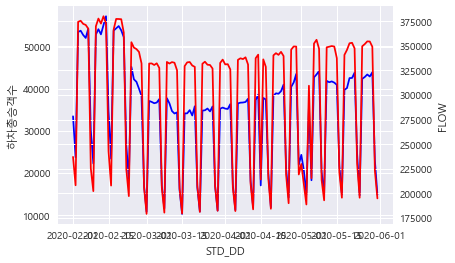

In [124]:
fig, ax1 = plt.subplots()
g = sns.lineplot(data=pd.merge(jung_off,JUNG_pp,left_on='사용일자',right_on='STD_DD'),x='STD_DD',y='하차총승객수',ax=ax1,color='b')
ax2 = ax1.twinx()
ax2 = sns.lineplot(data=pd.merge(jung_off,JUNG_pp,left_on='사용일자',right_on='STD_DD'),x='STD_DD',y='FLOW',color='r')
plt.show()

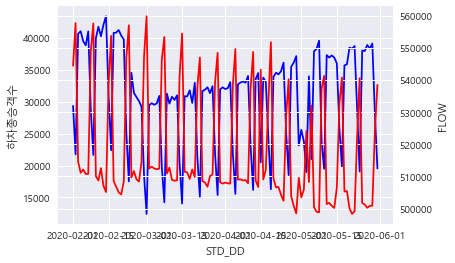

In [118]:
fig, ax1 = plt.subplots()
g = sns.lineplot(data=pd.merge(nowon_off,NOWON_pp,left_on='사용일자',right_on='STD_DD'),x='STD_DD',y='하차총승객수',ax=ax1,color='b')
ax2 = ax1.twinx()
ax2 = sns.lineplot(data=pd.merge(nowon_off,NOWON_pp,left_on='사용일자',right_on='STD_DD'),x='STD_DD',y='FLOW',color='r')
plt.show()

In [125]:
pd.merge(nowon_off,nowon_on,on='사용일자')[['하차총승객수','승차총승객수']].corr()

,하차총승객수,승차총승객수
하차총승객수,1.00000,0.99983
승차총승객수,0.99983,1.00000
